In [3]:
import pandas as pd
# massaa => https://en.wikipedia.org/w/index.php?title=Proteinogenic_amino_acid&section=2
aamm = pd.read_table('massaa')
aamm.dtypes

Amino Acid          object
Short               object
Abbrev.             object
Formula             object
Mon. Mass§ (Da)    float64
Avg. Mass (Da)     float64
dtype: object

In [4]:
aamm['Mon. Mass§ (Da)']

0      71.03711
1     156.10111
2     114.04293
3     115.02694
4     103.00919
5     129.04259
6     128.05858
7      57.02146
8     137.05891
9     113.08406
10    113.08406
11    128.09496
12    131.04049
13    147.06841
14     97.05276
15    237.14773
16    150.95364
17     87.03203
18    101.04768
19    186.07931
20    163.06333
21     99.06841
Name: Mon. Mass§ (Da), dtype: float64

['G', 'L', 'S', 'D', 'G', 'E', 'W', 'Q', 'Q', 'V', 'L', 'N', 'V', 'W', 'G', 'K'] [58.02874, 171.11280000000002, 258.14483, 373.17177, 430.19322999999997, 559.23582, 745.31513, 873.37371, 1001.43229, 1100.5007, 1213.58476, 1327.62769, 1426.6961000000001, 1612.7754100000002, 1669.7968700000001, 1797.8918300000003] [58.02874, 171.11280000000002, 258.14483, 373.17177, 430.19322999999997, 559.23582, 745.31513, 873.37371, 1001.43229, 1100.5007, 1213.58476, 1327.62769, 1426.6961000000001, 1612.7754100000002, 1669.7968700000001, 1797.8918300000003] [1814.89511]


([<matplotlib.axis.XTick at 0x7f7ab6b13b38>,
 <a list of 16 Text xticklabel objects>)

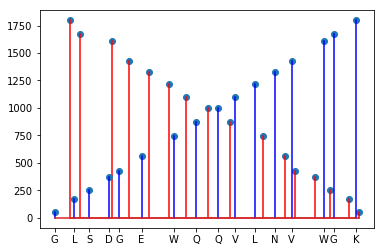

In [6]:
mmH2O = 18.01056
mmProton = 1.00728
pep = 'GLSDGEWQQVLNVWGK'
# http://www.ionsource.com/tutorial/DeNovo/b_and_y.htm
# pep='MIGQK'
tMass = 0.0
bIon = 0.0
bIon_list = []
yIon_list = []
pep_list = []
for b in range(0, len(pep)):
    pep_list.append(pep[b])
    tMass = tMass + aamm[aamm['Short'] == pep[b]]['Mon. Mass§ (Da)'].values
    bIon = bIon + aamm[aamm['Short'] == pep[b]]['Mon. Mass§ (Da)'].values[0]
    bIon_list.append(bIon + mmProton)
    yIon = 0.0
    for y in range(b, len(pep)):
        yIon = yIon + aamm[aamm['Short'] ==
                           pep[y]]['Mon. Mass§ (Da)'].values[0]
    yIon_list.append(yIon + mmH2O + mmProton)
print(pep_list, bIon_list, bIon_list, tMass + mmH2O)
import matplotlib.pyplot as plt
plt.stem(yIon_list, bIon_list, 'r')
plt.stem(bIon_list, bIon_list, 'b')
plt.xticks(bIon_list, pep_list)